# Manual for phenotype analysis using phloemfinder
## loading the data

You will load your data as an object of the PhenotypeAnalysis class, so you can apply the funtions of this class to your data. Therefore, you will need to give the object a name to which you will refer when using these functions. In this example, I will call my object 'example'. To specify the name of your data file and where to find it, you enter the path to your data at 'bioassay_csv=' as done in the example.

Make sure your data is in a .csv format, uses '_' instead of ' ' (so no spaces), and is in lower case (so no capitals). The data shouls be in long format and contain columns with the following information:

* Sample identifiers, a unique ID for each sample that could for example be formatted as 'genotype_replicate'. Suggestion for column name: 'sample_id' 
* Grouping variables, for example genotypes or treatments. Suggestion for column name: 'genotype'
* The time at which bioassay scoring was performed, for example the number of days after infection. Suggestion for column name: 'day'
* The developmental stages that were scored during the bioassay. Suggestion for column name: 'stage'
* The counts of each stage per timepoint per sample. Suggestion for column name: 'number'

First load the PhenotypeAnalysis class. If your working with phloemfinder as a downloaded package, use:

In [ ]:
from phloemfinder.phenotype_analysis import PhenotypeAnalysis

If your working with phloemfinder as a local github clone, use:

In [1]:
import sys
sys.path.append('../src/phloemfinder/')

from phenotype_analysis import PhenotypeAnalysis

Then load your data as object of the PhenotypeAnalysis class:

In [16]:
example = PhenotypeAnalysis(bioassay_csv="./data_for_manuals/bioassay_example_data.csv")

Our data is now a Pandas DataFrame called 'bioassay' inside the 'example' object we just made. If you want to inspect it, you can use the standard methods to inspect a Pandas DataFrame. For example:

In [17]:
example.bioassay.head(5)

,sample_id,genotype,day,stage,number
0,cv_1,cv,2,eggs,50
1,cv_1,cv,2,first_instar,0
2,cv_1,cv,2,second_instar,0
3,cv_1,cv,2,third_instar,0
4,cv_1,cv,2,early_fourth_instar,0


## preparing the data
A few steps are now required to prepare the data before you can start with the analysis.

### reshaping
If you used the column names suggested above, you can immediatly run the next funtion. Otherwise you can indicate what column names you used by changing the imput for the parameters (between quotation marks). 

The parameters for this function are:
* sample_id: string, default='sample_id' <br> The name of the column that contains the sample identifiers.

* grouping_variable: string, default='genotype' <br> The name of the column that contains the names of the grouping variables. <br> Examples are genotypes or treatments

* developmental_stages: string, default='stage' <br> The name of the column that contains the developmental stages that were scored during the bioassay.

* count_values: string, default='numbers' <br> The name of the column that contains the counts.

* time: string, default='day' <br> The name of the column that contains the time at which bioassay scoring was performed. <br> Examples are the date or the number of days after infection.

In [18]:
example.reshape_to_wide(
    sample_id='sample_id', 
    grouping_variable='genotype', 
    developmental_stages='stage', 
    count_values='number', 
    time='day')

The example.bioassay is now reshaped from a long to a wide format with the counts of each developmental stage in a seperate columns. This makes the data accessible for the next pre-processing steps.

You can inspect the data again with:

In [19]:
example.bioassay.head(5)

stage,sample_id,genotype,day,early_fourth_instar,eggs,exuviea,first_instar,late_fourth_instar,second_instar,third_instar
0,cv_1,cv,2,0.0,50.0,0.0,0.0,0.0,0.0,0.0
1,cv_1,cv,7,0.0,NaN,0.0,20.0,0.0,5.0,0.0
2,cv_1,cv,9,2.0,NaN,0.0,20.0,0.0,15.0,10.0
3,cv_1,cv,12,15.0,NaN,0.0,5.0,5.0,10.0,10.0
4,cv_1,cv,15,15.0,NaN,1.0,0.0,9.0,5.0,10.0


### correcting for seperately counting of early- and late 4th instars and exuviea
With this step you can correct for counting the exuviea and early- and late 4th instars seperately. This will give you the total number of nymphs developed to the final developmental stage per sample on each timepoint This is used when nymphs in the (late) final nymph stage were removed after each counting moment and/or when exuviea and last instar stage nymphs were counted seperately. Exuviea is the name of the last larval skin that is left behind after a nymph has developed to an adult.

Removal of late last stage nymphs could for example be used to prevent adults from emerging and escaping.

To check before using the function below:

* Check the names of the stages in your data and change them if nessesary in the function.
* If you counted the exuviea as a sepperate stage, keep 'seperate_exuviea' as True. Otherwise, set 'seperate_exuviea' to False.
* If you removed the late 4th instar nymphs after counting them, keep 'late_last_stage_removed' as True. Otherwise, set to False.
* If you kept the early 4th instar nymphs on the leaf until developing to late 4th instar, keep 'early_last_stage_kept' as True. Otherwise, set to False.


The parameters for this function are:

* exuviea: string, default='exuviea' <br> The name of the column that contains the exuviea counts. 

* late_last_stage: string, default='late_fourth_instar' <br> The name of the column that contains the counts of the last developmental stage recorded in the bioassay.

* early_last_stage: string, default='early_fourth_instar' <br> The name of the column that contains the counts of the nymphs in early last developmental stage. <br> If early_last_stage_kept is False, this parameter can be ignored and only late_last_stage is used

* new_last_stage: string, default='fourth_instar' <br> Name for new column with the returned total final stage data

* seperate_exuviea: boolean, default=True <br> If True, sums exuviea and late_last_stage per sample per timepoint. <br> If exuviea were counted seperately from late_last_stage, set to True. <br> If exuviea count was included in late_last_stage, set to False

* late_last_stage_removed: boolean, default=True <br> If True, returns the cumulative number of late_last_stage(+exuviea) per sample over time. <br> If nymphs counted in late_last_stage (and exuviea if counted seperately) were removed after each counting  moment, set to True. <br> If nymphs counted in late_last_stage (and exuviea if counted seperately) were left on the sample untilending the bioassay, set to False.

* early_last_stage_kept: boolean, default=True <br> If True, sums the early and late last stage counts per sample per timepoint <br> If late last stage nymphs were removed after each counting moment, but early last stage nymphs were left onsample, set to True. <br> If early and late last stage nymphs were not counted seperately, set to False

* remove_individual_stage_columns: boolean, default=True <br> If True, removes exuviea, late_last_stage, early_last_stage columns from dataframe after returning new_last_stage column.

For the example data we set all boolean parameters to True, because in our whitefly experiments the exuvieae are counted seperately and the exuvieae and late 4th instar nymphs are removed after each counting moment, while the early 4th instar nymphs are kept on the leaf. Because we want to continue the analyses with the new combined last stage column, we set remove_individual_stage_columns to True.

In [20]:
example.combine_seperately_counted_versions_of_last_recorded_stage(
    exuviea='exuviea',
    late_last_stage='late_fourth_instar', 
    early_last_stage='early_fourth_instar',
    new_last_stage='fourth_instar',
    seperate_exuviea=True, 
    late_last_stage_removed=True, 
    early_last_stage_kept=True,
    remove_individual_stage_columns=True)

Our example.bioassay doesn't have seperate columns for early and late last stages and exuvieae anymore, but instead has one column called fourth_instar. We can inspect our data again with:

In [21]:
example.bioassay.head(5)

stage,sample_id,genotype,day,eggs,first_instar,second_instar,third_instar,fourth_instar
0,cv_1,cv,2,50.0,0.0,0.0,0.0,0.0
1,cv_1,cv,7,NaN,20.0,5.0,0.0,0.0
2,cv_1,cv,9,NaN,20.0,15.0,10.0,2.0
3,cv_1,cv,12,NaN,5.0,10.0,10.0,20.0
4,cv_1,cv,15,NaN,0.0,5.0,10.0,30.0


### calculating the cumulative development
The last step in the data preperation is the calculation of the cumulative development to each stage over time. Check the names of the stages in your data and change them if nessesary in the function. If you combined the early- and late 4th instars and exuviea in the previous step, these are seen as 1 developmental stage now. So if you counted 1st, 2nd, 3rd and 4th instars, 'n_developmental_stages' should be 4 (eggs are not included in the developmental stages). If you combined the 2nd and 3rd instars in your count, 'n_developmental_stages' should be 3.

The parameters for this function are:

* n_developmental_stages: integer, default=4 <br> The number of developmental stages which were recorded seperately. Can range from 2 to 6.

* sample_id: string, default='sample_id' <br> The name of the column that contains the sample identifiers.

* eggs: string, default='eggs' <br> The name of the column that contains the counts of the eggs.

* first_stage: string, default='first_instar' <br> The name of the column that contains the counts of the first developmental stage recorded in the bioassay.

* second_stage: string, default='second_instar' <br> The name of the column that contains the counts of the second developmental stage recorded in the bioassay.

* third_stage: string, default='third_instar' <br> The name of the column that contains the counts of the third developmental stage recorded in the bioassay.

* fourth_stage: string, default='fourth_instar' <br> The name of the column that contains the counts of the fourth developmental stage recorded in the bioassay.

* fifth_stage: string, default='fifth_instar' <br> The name of the column that contains the counts of the fifth developmental stage recorded in the bioassay.

* sixth_stage: string, default='sixth_instar' <br> The name of the column that contains the counts of the sixth developmental stage recorded in the bioassay.

For the example data, we have counts of all four nymphal stages, so we set n_developmental_stages to 4. This also means that we're not interested in the options for a 5th and 6th stage and therefore ignore these parameters.

In [23]:
example.convert_counts_to_cumulative(
    n_developmental_stages=4, 
    sample_id='sample_id', 
    eggs='eggs', 
    first_stage='first_instar', 
    second_stage='second_instar', 
    third_stage='third_instar', 
    fourth_stage='fourth_instar')

This function creates three new data frames in the example object:
* max_counts <br> This is used to make the boxplots
* cumulative_data <br> This is used for the development curve
* survival_data <br> This is used for the survival curve

We can again inspect these data frames:

In [24]:
example.max_counts.head(5)

stage,sample_id,genotype,day,eggs,first_instar,second_instar,third_instar,fourth_instar
0,cv_1,cv,19,50.0,47.0,45.0,45.0,40.0
1,cv_3,cv,19,55.0,52.0,50.0,50.0,45.0
2,wild_2,wild,15,60.0,39.0,36.0,30.0,18.0
3,wild_4,wild,15,50.0,32.0,26.0,23.0,15.0


In [25]:
example.cumulative_data.head(5)

stage,sample_id,genotype,day,eggs,first_instar,second_instar,third_instar,fourth_instar
0,cv_1,cv,2,50.0,0.0,0.0,0.0,0.0
1,cv_1,cv,7,NaN,25.0,5.0,0.0,0.0
2,cv_1,cv,9,NaN,47.0,27.0,12.0,2.0
3,cv_1,cv,12,NaN,47.0,40.0,30.0,20.0
4,cv_1,cv,15,NaN,47.0,45.0,40.0,30.0


In [26]:
example.survival_data.head(5)

stage,sample_id,genotype,day,eggs,first_instar,second_instar,third_instar,fourth_instar
0,cv_1,cv,2,50.0,0.0,0.0,0.0,0.0
1,cv_1,cv,7,NaN,25.0,5.0,0.0,0.0
2,cv_1,cv,9,NaN,47.0,27.0,12.0,2.0
3,cv_1,cv,12,NaN,45.0,40.0,30.0,20.0
4,cv_1,cv,15,NaN,45.0,45.0,40.0,30.0


## plotting
Before plotting, you should decide in what order you want the groups (i.e. genotypes or treatments) to appear in the plot (from left to right on the x-axis).

In the example data we only have two genotypes as groups: cv and wild. We want cv to always appear on the left and wild on the right, so that is what we fill in as order_of_groups.


In [28]:
example.prepare_for_plotting(order_of_groups=['cv', 'wild'])

Now we're ready to have a look at our data!

### boxplots per stage
It is advisable to start with boxplots, to get an overview of all stages. 
In the top row the boxplots display the absolute number of nymphs that developed to each stage over the course of the experiment per grouping variable (genotype, treatment, etc.). On the bottom row is the relative development to each stage and the hatching rate. You can decide for yourself to which stage the development should be made relative.

It is only possible to plot up to four developmental stages (next to the eggs) per set of boxplots.

The parameters for this function are:

* grouping_variable: string, default='genotype' <br> The name of the column that contains the names of the grouping variables. <br> Examples are genotypes or treatments

* sample_id: string, default='sample_id' <br> The name of the column that contains the sample identifiers.

* eggs: string, default='eggs' <br> The name of the column that contains the counts of the eggs.

* first_stage: string, default='first_instar' <br> The name of the column that contains the counts of the first developmental stage recorded in the bioassay.

* second_stage: string, default='second_instar' <br> The name of the column that contains the counts of the second developmental stage recorded in the bioassay.

* third_stage: string, default='third_instar' <br> The name of the column that contains the counts of the third developmental stage recorded in the bioassay.

* fourth_stage: string, default='fourth_instar' <br> The name of the column that contains the counts of the fourth developmental stage recorded in the bioassay.

* absolute_x_axis_label: string, default='genotype' <br>  Label for the x-axis of the boxplots with count data.

* absolute_y_axis_label: string, default='counts (absolute)' <br>  Label for the y-axis of the boxplots with count data.

* relative_x_axis_label: string, default='genotype' <br> Label for the x-axis of the boxplots with relative development.

* relative_y_axis_label: string, default='relative number of nymphs' <br>  Label for the y-axis of the boxplots with relative development.

* make_nymphs_relative_to: string, default='first_instar' <br> The name of the column that contains the counts of the developmental stage which should be used to calculate the relative development to all developmental stages.

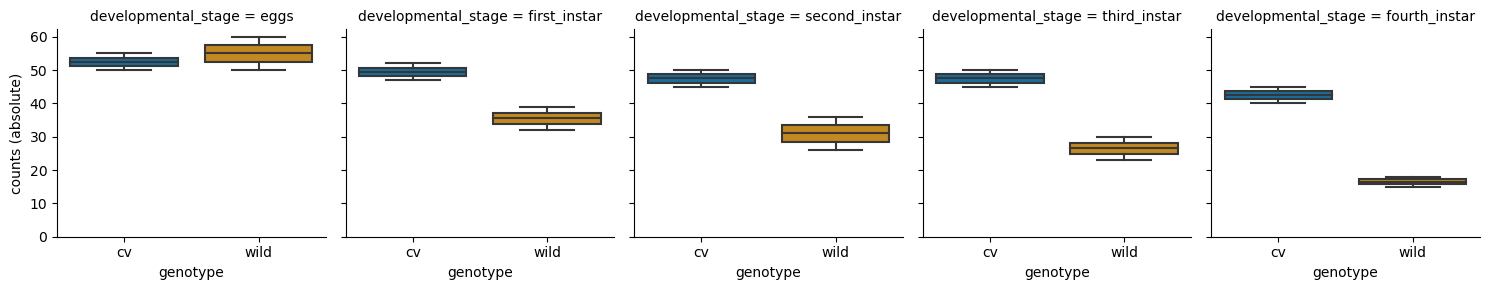

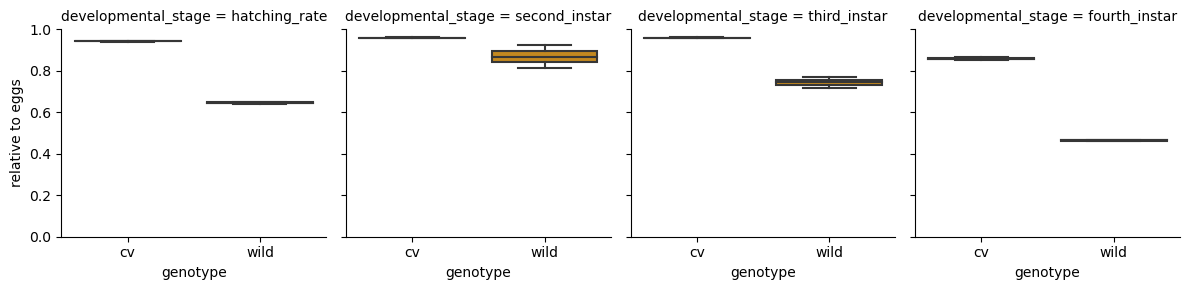

In [29]:
example.plot_counts_per_stage(
    grouping_variable='genotype', 
    eggs='eggs', 
    first_stage='first_instar', 
    second_stage='second_instar', 
    third_stage='third_instar', 
    fourth_stage='fourth_instar', 
    make_nymphs_relative_to='first_instar',
    absolute_x_axis_label='genotype',
    absolute_y_axis_label='counts (absolute)',
    relative_x_axis_label='genotype',
    relative_y_axis_label='relative to eggs')

### curve of development over time
If you identified the most interesting developmental stage on which you want to zoom in further, you can now include the developmental speed. By fitting the data to a 3 parameter log-logistic model (S-curve that starts at 0), you can compare the different groups in more detail. The function below returns a plot with a curve for each group and a table with the values of the parameters of the model for each group and the chi-squared.

Explenation of the table:

* slope: the slope of the curve, with the standard deviation
* maximum: the maximum value of the curve, with the standard deviation
* emt50: the EmT50, the timepoint at which 50% of nymphs has developed to the stage of interest, with the standard deviation
* reduced_chi2: the reduced Chi-squared is provided to asses the goodness of fit for the fitted models for each group (genotype, treatment, etc.). Optimaly, the reduced Chi-squared should approach the number of observation points per sample. A much larger reduced Chi-squared indicates a bad fit. A much smaller reduced Chi-squared indicates overfitting of the model.

The parameters for this function are:

* grouping_variable: string, default='genotype' <br> The name of the column that contains the names of the grouping variables. Examples are genotypes or treatments

* sample_id: string, default='sample_id' <br> The name of the column that contains the sample identifiers.

* time: string, default='day' <br> The name of the column that contains the time at which bioassay scoring was performed. Examples are the date or the number of days after infection.

* x_axis_label: string, default='days after infection' <br> Label for the x-axis

* y_axis_label: string, default='development to 4th instar stage (relative to 1st instars)' <br> Label for the y-axis

* stage_of_interest: string, default='fourth_instar' <br> The name of the column that contains the data of the developmental stage of interest.

* use_relative_data: boolean, default=True <br> If True, the counts for the stage of interest are devided by the stage indicated at 'make_nymphs_relative_to'. The returned relative rate is used for plotting and curve fitting.

* make_nymphs_relative_to: string, default='first_instar' <br> The name of the column that contains the counts of the developmental stage which should be used to calculate the relative development to all developmental stages.

* predict_for_n_days: default=o <br> Continue model for n days after final count.

                  slope(±sd) maximum(±sd)       emt50(±sd)  reduced_chi2
genotype                                                                
cv              -7.19(±0.97)  0.87(±0.04)     12.33(±0.28)    153.084916
wild      -83.20(±200478.38)  0.47(±0.00)  12.53(±1295.59)      1.000000


/Users/lissydenkers/Documents/GitHub/phloemfinder/example_data/manuals/../../src/phloemfinder/phenotype_analysis.py:761: RuntimeWarning: invalid value encountered in log
  return(maximum/(1+np.exp(slope*(np.log(x)-np.log(emt50)))))


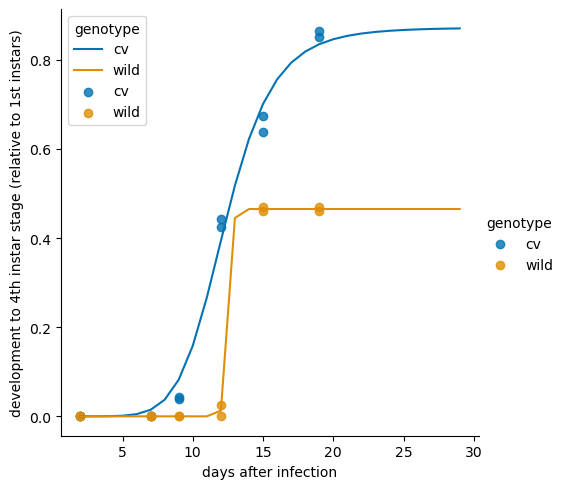

In [30]:
example.plot_development_over_time_in_fitted_model(
    sample_id='sample_id', 
    grouping_variable='genotype',
    time='day',
    stage_of_interest='fourth_instar',
    use_relative_data=True, 
    make_nymphs_relative_to='first_instar',
    x_axis_label='days after infection',
    y_axis_label='development to 4th instar stage (relative to 1st instars)',
    predict_for_n_days=10)

Because of the tiny sample size of the test data (only 2!) the fit of the model is very poor. For real data this should be much better.
<br>
<br>

### curve of hatching and survival over time
Alternatively, you could compare the total number living nymphs (so excluding the eggs) over time. The data is fitted to a log-normal model (a right skewed bell curve). The function below returns a plot with a curve for each group and a table with the values of the parameters of the model for each group and the chi-squared.

Explenation of the table:

* AUC: the area under the curve, with the standard deviation
* median: the median timepoint, with the standard deviation
* shape: the shape of the curve, with the standard deviation. A larger number is a stronger skewed curve.
* reduced_chi2: the reduced Chi-squared is provided to asses the goodness of fit for the fitted models for each group (genotype, treatment, etc.). Optimaly, the reduced Chi-squared should approach the number of observation points per sample. A much larger reduced Chi-squared indicates a bad fit. A much smaller reduced Chi-squared indicates overfitting of the model.

The parameters for this function are:

* grouping_variable: string, default='genotype' <br> The name of the column that contains the names of the grouping variables. Examples are genotypes or treatments

* sample_id: string, default='sample_id' <br> The name of the column that contains the sample identifiers.

* time: string, default='day' <br> The name of the column that contains the time at which bioassay scoring was performed. Examples are the date or the number of days after infection.

* x_axis_label: string, default='days after infection' <br> Label for the x-axis

* y_axis_label: string, default='development to 4th instar stage (relative to 1st instars)' Label for the y-axis

* stage_of_interest: string, default='first_instar' <br> The name of the column that contains the data of the developmental stage of interest.

* use_relative_data: boolean, default=False <br> If True, the counts for the stage of interest are devided by the stage indicated at 'make_nymphs_relative_to'. <br> The returned relative rate is used for plotting and curve fitting.

* make_nymphs_relative_to: string, default='eggs' <br> The name of the column that contains the counts of the developmental stage which should be used to calculate the relative development to all developmental stages.

* predict_for_n_days: default=o <br> Continue model for n days after final count.

             AUC(±sd)  median(±sd)    shape(±sd)  reduced_chi2
genotype                                                      
cv        4.31(±1.10)  9.52(±0.65)   3.88(±0.66)    910.571074
wild      0.44(±0.20)  8.30(±0.38)  16.63(±7.04)      6.629356


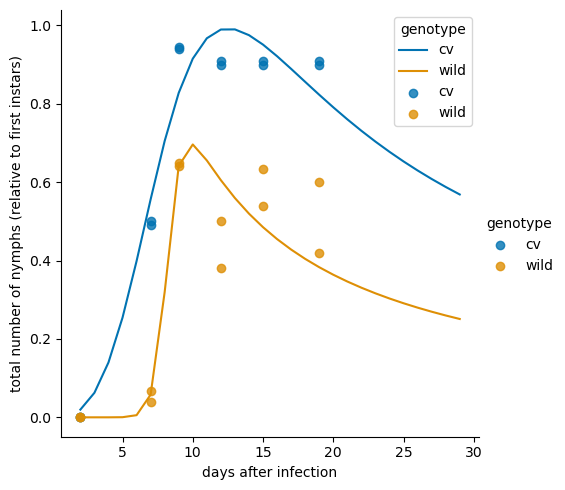

In [33]:
example.plot_survival_over_time_in_fitted_model(
    sample_id='sample_id', 
    grouping_variable='genotype',
    time='day',
    stage_of_interest='first_instar', 
    x_axis_label='days after infection',
    y_axis_label='total number of alive nymphs',
    use_relative_data=False,
    make_nymphs_relative_to='eggs',
    predict_for_n_days=10)